In [2]:
import anndata as ad
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import scvi

/home/albert.baichorov/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/albert.baichorov/.venv/lib/python3.10/site-packages/docrep/decorators.py:43: SyntaxWarning: 'param_categorical_covariate_keys' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)
/home/albert.baichorov/.venv/lib/python3.10/site-packages/docrep/decorators.py:43: SyntaxWarning: 'param_continuous_covariate_keys' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)


# All genes

In [3]:
adata = ad.read_h5ad("/home/albert.baichorov/ImSysAging/data/scRNA-seq.h5ad")
print(adata)

AnnData object with n_obs × n_vars = 538266 × 22091
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.HB', 'percent.RPS', 'S.Score', 'G2M.Score', 'Phase', 'umis_TCR', 'umis_BCR', 'primary_type', 'secondary_type', 'sequential_group', 'eight_group', 'sampleName', 'age'
    uns: 'version'
    layers: 'RNA_counts', 'RNA_data'


Based on the clean scRNA-seq data after quality control, gene expression profiles were normalized for each cell using the
LogNormalize method with the Seurat NormalizeData function.
 
The FindVariableFeatures function was then applied to identify the highly variable genes using the default parameters.

Next, we scaled the data using the ScaleData function and performed principal component
analysis on the scaled data using the RunPCA function with default parameters

The scVIIntegration algorithm was used for batch correction70.

We constructed a shared nearest neighbor graph using the FindNeighbors function and clustered cells using the Louvain algorithm
with the FindClusters function based on the scVIIntegration reduction.

Finally, the RunUMAP function facilitated the visualization of all cells.
A total of 538,266 high-quality cells were derived from 61 samples.

In [4]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.HB,percent.RPS,S.Score,G2M.Score,Phase,umis_TCR,umis_BCR,primary_type,secondary_type,sequential_group,eight_group,sampleName,age
AAACCTGAGGCGTACA-1-sample42,seurat_object,7685.0,1889.0,2.446324,0.000000,47.690306,0.008262,0.003594,S,26,-2147483648,CD4T,CD4_TEM_ANXA1,60y,50-60y,sample42,60
AAACCTGAGGGAGTAA-1-sample42,seurat_object,6206.0,1911.0,3.045440,0.000000,36.545279,0.008496,-0.042660,S,11,-2147483648,CD4T,CD4_TEM_ANXA1,60y,50-60y,sample42,60
AAACCTGCAGCGATCC-1-sample42,seurat_object,4726.0,1764.0,4.485823,0.000000,26.195514,0.089389,0.009794,S,-2147483648,-2147483648,CD8T,CD8_TEM_GNLY,60y,50-60y,sample42,60
AAACCTGCATATGGTC-1-sample42,seurat_object,7870.0,2112.0,3.481576,0.000000,42.757306,-0.002148,0.009421,G2M,-2147483648,35,B,B_Memory,60y,50-60y,sample42,60
AAACCTGCATTGAGCT-1-sample42,seurat_object,9081.0,2095.0,5.241713,0.000000,46.558749,0.000482,0.006435,G2M,-2147483648,14,B,B_Memory,60y,50-60y,sample42,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGAGAGGAGTGTTGAA-1-sample52,seurat_object,5295.0,1577.0,2.134089,0.000000,42.662890,0.054058,0.006361,S,18,-2147483648,CD4T,CD4_Naive_CCR7,80y,70-80y,sample52,80
TGATTTCCAACTAGAC-1-sample52,seurat_object,3292.0,1499.0,3.948967,0.000000,24.119077,-0.004835,0.076335,G2M,3,-2147483648,CD8T,CD8_TEM_GNLY,80y,70-80y,sample52,80
TGGCCAGGTGTGGTTT-1-sample52,seurat_object,4137.0,1723.0,4.423495,0.000000,27.121102,-0.033304,-0.035709,G1,8,-2147483648,CD4T,CD4_TEM_ANXA1,80y,70-80y,sample52,80
TGTGTTTTCGGAAACG-1-sample52,seurat_object,5642.0,1737.0,6.097129,0.017724,37.238568,0.021595,-0.015182,S,18,-2147483648,CD4T,CD4_TEM_ANXA1,80y,70-80y,sample52,80


In [ ]:
# Нормализация данных
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.scale(adata)

# PCA анализ
sc.pp.pca(adata)

#adata.write_h5ad("scRNA-seqPCA.h5ad")

In [ ]:
adata = ad.read_h5ad("/home/albert.baichorov/ImSysAging/scRNA-seqPCA.h5ad")
del adata.layers["RNA_data"]

In [30]:
sce.pp.harmony_integrate(adata, "sampleName")

2025-03-14 16:49:29,123 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-03-14 16:49:57,104 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-03-14 16:50:30,599 - harmonypy - INFO - Iteration 1 of 10
2025-03-14 17:11:53,690 - harmonypy - INFO - Iteration 2 of 10
2025-03-14 17:32:52,404 - harmonypy - INFO - Iteration 3 of 10
2025-03-14 17:54:15,715 - harmonypy - INFO - Iteration 4 of 10
2025-03-14 18:15:03,832 - harmonypy - INFO - Iteration 5 of 10
2025-03-14 18:35:41,705 - harmonypy - INFO - Iteration 6 of 10
2025-03-14 18:58:35,372 - harmonypy - INFO - Converged after 6 iterations


In [32]:
adata.write_h5ad("scRNA-seqPCA_H.h5ad")

In [ ]:
meta_data = adata.obs[['age', 'sampleName', 'primary_type', 'secondary_type']]

cell_embeddings = pd.DataFrame(adata.obsm['X_pca_harmony'], index=adata.obs.index).join(meta_data)
cell_embeddings['age'] = cell_embeddings['age'].astype('float')
cell_embeddings.to_csv("scRNA-seqEmbAge.csv")

In [33]:
adata

AnnData object with n_obs × n_vars = 538266 × 22091
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.HB', 'percent.RPS', 'S.Score', 'G2M.Score', 'Phase', 'umis_TCR', 'umis_BCR', 'primary_type', 'secondary_type', 'sequential_group', 'eight_group', 'sampleName', 'age'
    var: 'mean', 'std'
    uns: 'log1p', 'pca', 'version'
    obsm: 'X_pca', 'X_pca_harmony'
    varm: 'PCs'
    layers: 'RNA_counts'

In [36]:
del adata.obsm['X_pca']

In [42]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.HB,percent.RPS,S.Score,G2M.Score,Phase,umis_TCR,umis_BCR,primary_type,secondary_type,sequential_group,eight_group,sampleName,age
AAACCTGAGGCGTACA-1-sample42,seurat_object,7685.0,1889.0,2.446324,0.000000,47.690306,0.008262,0.003594,S,26,-2147483648,CD4T,CD4_TEM_ANXA1,60y,50-60y,sample42,60
AAACCTGAGGGAGTAA-1-sample42,seurat_object,6206.0,1911.0,3.045440,0.000000,36.545279,0.008496,-0.042660,S,11,-2147483648,CD4T,CD4_TEM_ANXA1,60y,50-60y,sample42,60
AAACCTGCAGCGATCC-1-sample42,seurat_object,4726.0,1764.0,4.485823,0.000000,26.195514,0.089389,0.009794,S,-2147483648,-2147483648,CD8T,CD8_TEM_GNLY,60y,50-60y,sample42,60
AAACCTGCATATGGTC-1-sample42,seurat_object,7870.0,2112.0,3.481576,0.000000,42.757306,-0.002148,0.009421,G2M,-2147483648,35,B,B_Memory,60y,50-60y,sample42,60
AAACCTGCATTGAGCT-1-sample42,seurat_object,9081.0,2095.0,5.241713,0.000000,46.558749,0.000482,0.006435,G2M,-2147483648,14,B,B_Memory,60y,50-60y,sample42,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGAGAGGAGTGTTGAA-1-sample52,seurat_object,5295.0,1577.0,2.134089,0.000000,42.662890,0.054058,0.006361,S,18,-2147483648,CD4T,CD4_Naive_CCR7,80y,70-80y,sample52,80
TGATTTCCAACTAGAC-1-sample52,seurat_object,3292.0,1499.0,3.948967,0.000000,24.119077,-0.004835,0.076335,G2M,3,-2147483648,CD8T,CD8_TEM_GNLY,80y,70-80y,sample52,80
TGGCCAGGTGTGGTTT-1-sample52,seurat_object,4137.0,1723.0,4.423495,0.000000,27.121102,-0.033304,-0.035709,G1,8,-2147483648,CD4T,CD4_TEM_ANXA1,80y,70-80y,sample52,80
TGTGTTTTCGGAAACG-1-sample52,seurat_object,5642.0,1737.0,6.097129,0.017724,37.238568,0.021595,-0.015182,S,18,-2147483648,CD4T,CD4_TEM_ANXA1,80y,70-80y,sample52,80


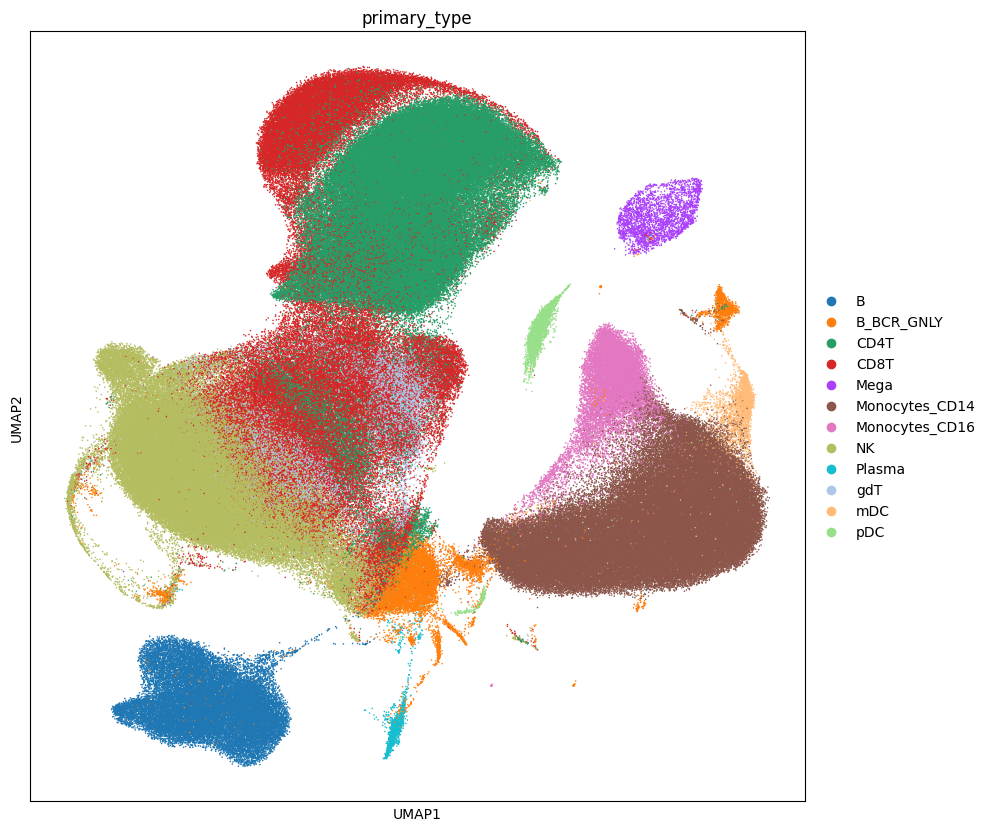

In [ ]:

from matplotlib import rcParams

FIGSIZE = (10, 10)
rcParams["figure.figsize"] = FIGSIZE

sc.pl.umap(adata, color=["primary_type"], size=5)

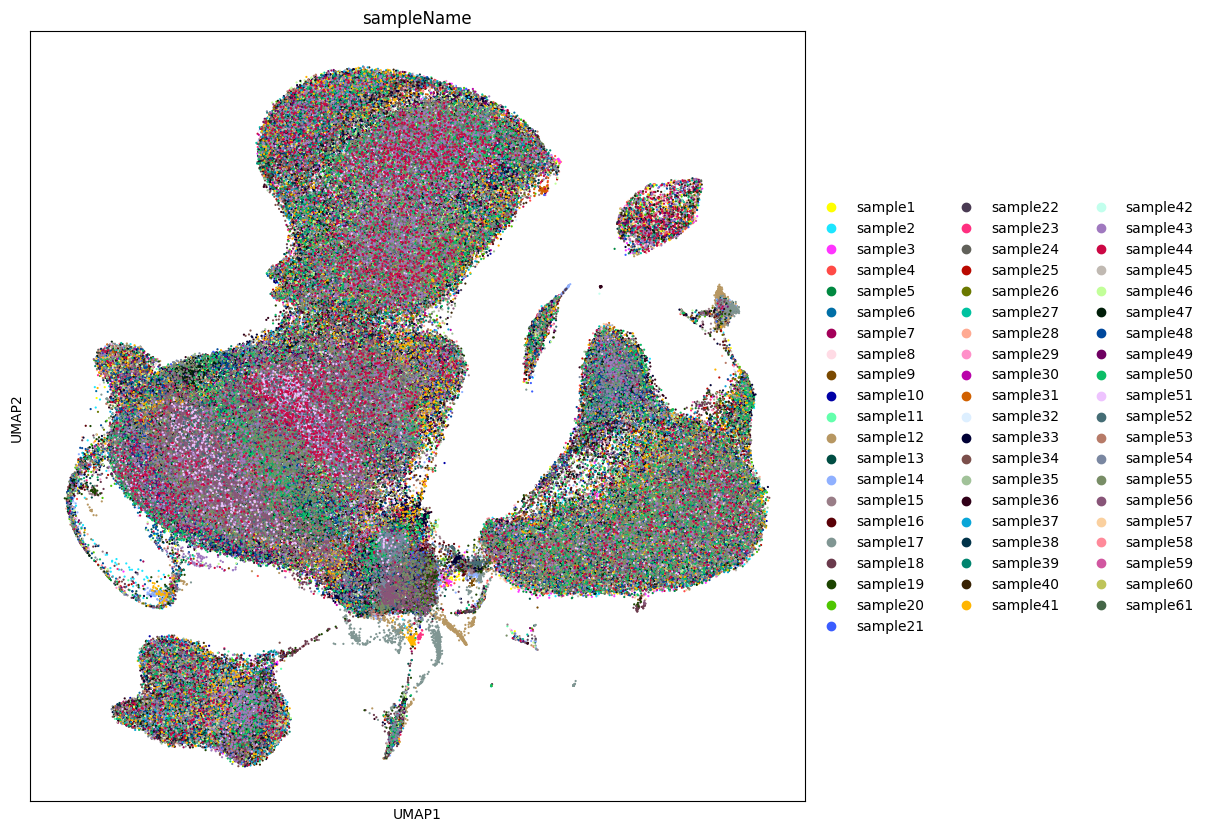

In [69]:
sc.pl.umap(adata, color=["sampleName"], size=10)

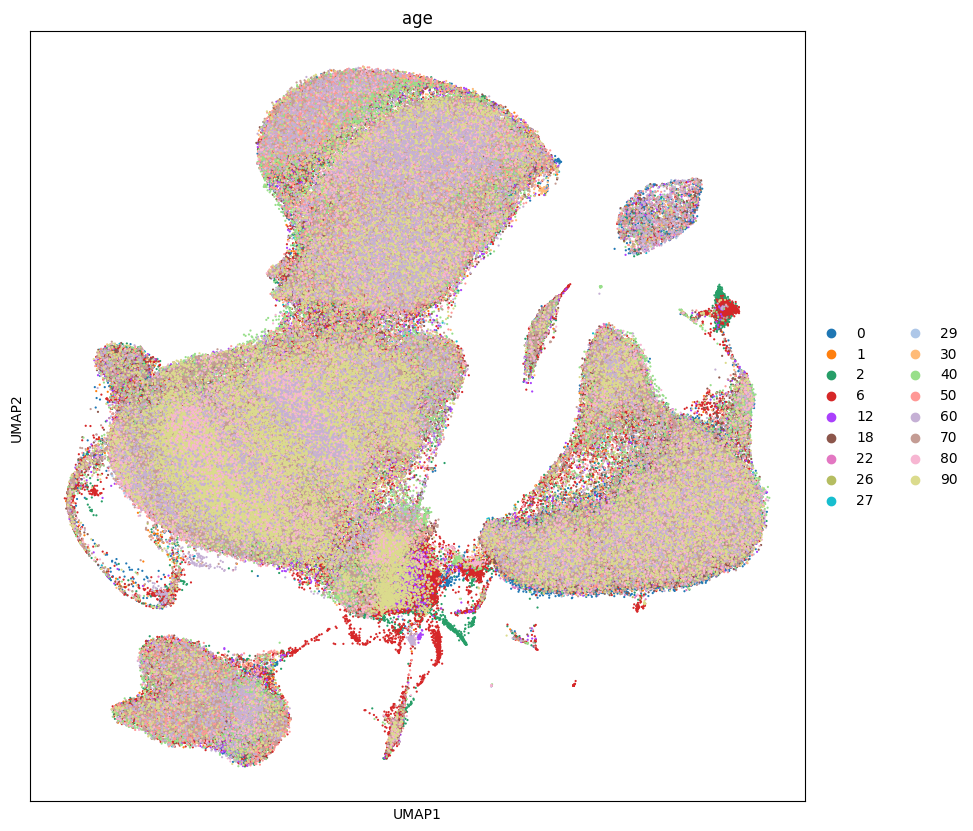

In [ ]:
sc.pl.umap(adata, color=["age"], size=10)

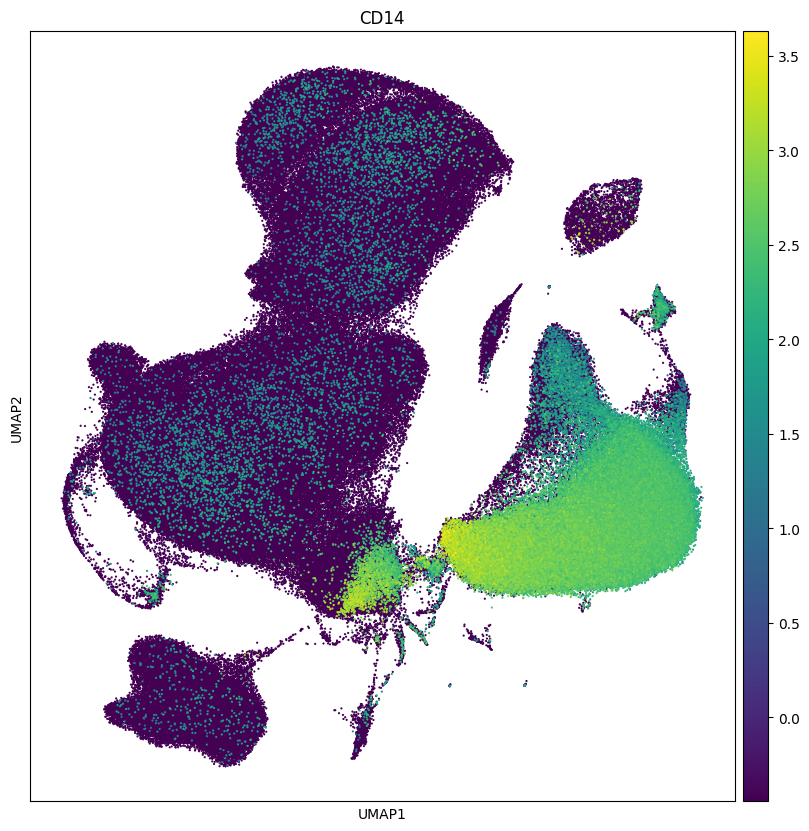

In [71]:
sc.pl.umap(adata, color='CD14', size=10)

In [ ]:
sc.pl.umap(adata, color="HES4")